In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Dataset/mtcars.csv')

In [3]:
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


##### Separate the input and output variables

In [4]:
# disp, hp, wt as input
x = df[['disp','hp','wt']]

# mpg as output
y = df['mpg']

In [5]:
x.corrwith(y) #This gives correlation between specific variables in case of multivalued input

disp   -0.847551
hp     -0.776168
wt     -0.867659
dtype: float64

##### Build the model

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
regressor = LinearRegression()

In [8]:
regressor.fit(x,y)

LinearRegression()

In [9]:
regressor.score(x, y) # Check accuracy using R2 score

0.8268361424946447

In [10]:
regressor.coef_

array([-9.37009081e-04, -3.11565508e-02, -3.80089058e+00])

In [11]:
regressor.intercept_

37.10550526903182

##### Predict on unseen data

In [12]:
disp = 221
hp = 102
wt = 2.91

In [13]:
new = pd.DataFrame({'disp':[221],'hp':[102],'wt':[2.91]})

In [14]:
new

,disp,hp,wt
0,221,102,2.91


In [15]:
regressor.predict(new) # This takes data frame as input

array([22.65986648])

In [16]:
# Internal working
disp * regressor.coef_[0] + hp * regressor.coef_[1] + wt * regressor.coef_[2] + regressor.intercept_

22.65986648189271

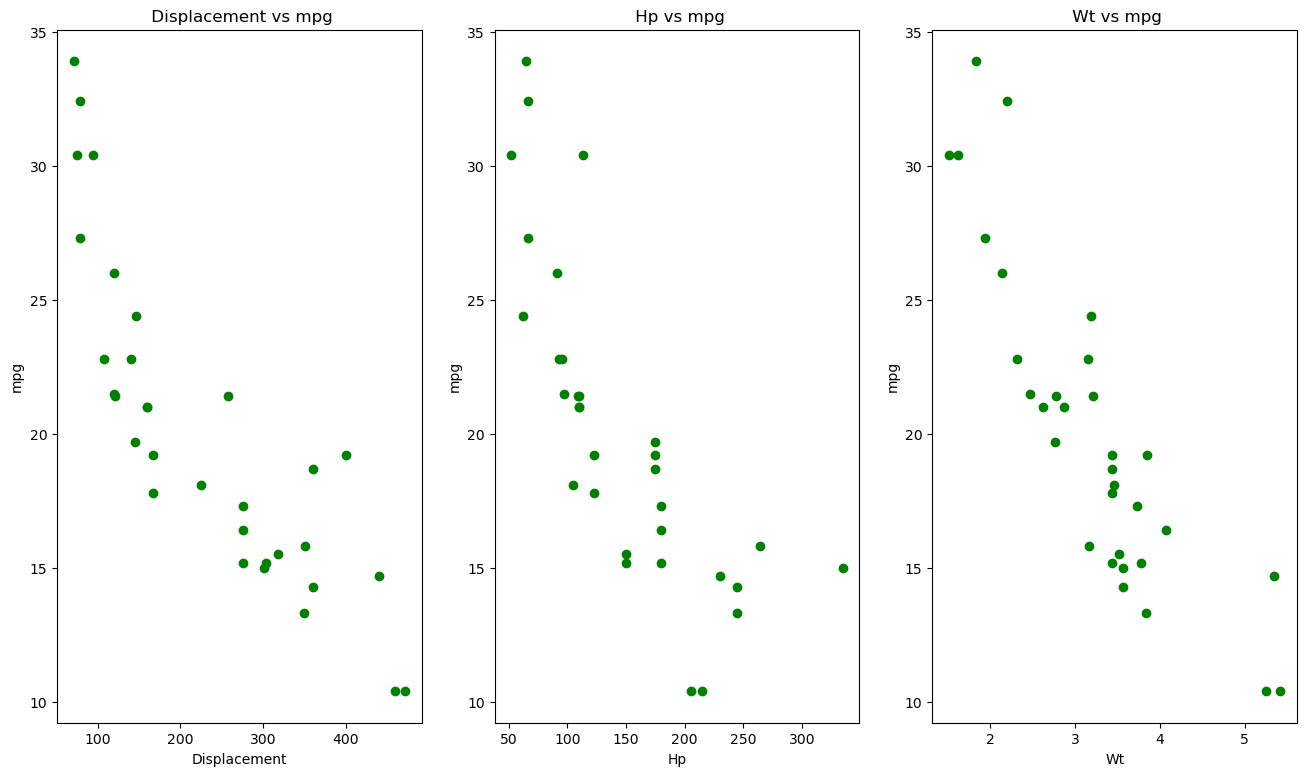

In [17]:
plt.figure(figsize=(16,9))
plt.subplot(1,3,1)
plt.title(' Displacement vs mpg')
plt.xlabel('Displacement')
plt.ylabel('mpg')
plt.scatter(x['disp'],y, color ='green')
plt.subplot(1,3,2)
plt.title(' Hp vs mpg')
plt.xlabel('Hp')
plt.ylabel('mpg')
plt.scatter(x['hp'],y, color ='green')
plt.subplot(1,3,3)
plt.title(' Wt vs mpg')
plt.xlabel('Wt')
plt.ylabel('mpg')
plt.scatter(x['wt'],y, color ='green')

##### Adaboost the regression

In [21]:
from sklearn.ensemble import AdaBoostRegressor # there is AdaBoostClassifier for binary/multiclass classification

In [40]:
reg_adb = AdaBoostRegressor(regressor, n_estimators = 3, random_state=0) # Total n_estimators are fixed to 3

In [41]:
reg_adb.fit(x,y)

AdaBoostRegressor(estimator=LinearRegression(), n_estimators=3, random_state=0)

In [42]:
reg_adb.score(x,y)

0.8273159099884393